# Homework 4 Spring 2022

Due 04/18 23:59 

### Your name: Chandan Suri

### Your UNI: CS4090

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)

# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="images/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [ ]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.sum(dLdZ2, axis = 0)
    
    dLdH = np.dot(dLdZ2[:, np.newaxis], weights['W2'][np.newaxis, :])
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.sum(dLdZ1, axis = 0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

In [ ]:
def plot_sampled_images(X_data, Y_data, num_rows, num_cols, title):
    num_images_to_sample = num_rows * num_cols
    images_ls = X_data[:num_images_to_sample]
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize = (2 * num_rows, 2 * num_cols))
    fig.suptitle(title)
    for curr_idx, image in enumerate(images_ls):
        ax = axes[curr_idx//num_cols, curr_idx%num_cols]
        ax.imshow(image)
        ax.set_title(f"Label: {Y_data[curr_idx]}")
        ax.axis('off')
        
    plt.show()

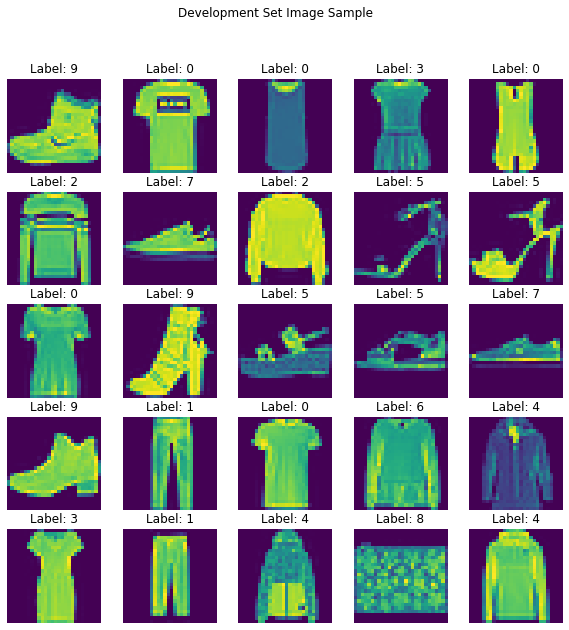

In [ ]:
# Plot dev samples
plot_sampled_images(xdev, ydev, 5, 5, "Development Set Image Sample")

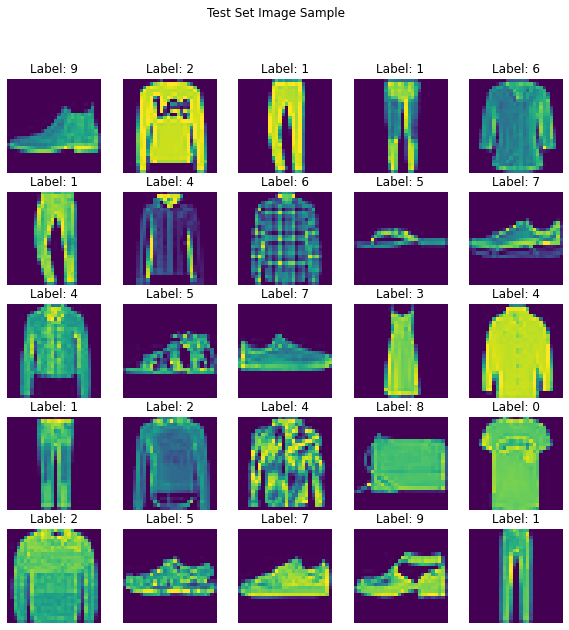

In [ ]:
# Plot test samples
plot_sampled_images(xtest, ytest, 5, 5, "Test Set Image Sample")

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [ ]:
# Print
print(f"X Development Shape: {xdev.shape}")
print(f"Y Development Shape: {ydev.shape}")
print(f"X Test Shape: {xtest.shape}")
print(f"Y Test Shape: {ytest.shape}")

X Development Shape: (60000, 28, 28)
Y Development Shape: (60000,)
X Test Shape: (10000, 28, 28)
Y Test Shape: (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [ ]:
'''
I am going to use the reshape as that is faster!
'''
import time

start_time = time.time()
xdev_images = np.array([dev_image.flatten() for dev_image in xdev])
end_time = time.time()
print(f"Time taken: {end_time - start_time}")

start_time = time.time()
xdev_images = xdev.reshape(xdev.shape[0], xdev.shape[1] * xdev.shape[2])
end_time = time.time()
print(f"Time taken: {end_time - start_time}")

Time taken: 0.3566615581512451
Time taken: 0.0005335807800292969


In [ ]:
# Flatten and print
xdev = xdev.reshape(xdev.shape[0], xdev.shape[1] * xdev.shape[2])
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1] * xtest.shape[2])

print(f"X Development Shape: {xdev.shape}")
print(f"X Test Shape: {xtest.shape}")

X Development Shape: (60000, 784)
X Test Shape: (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [ ]:
# Standardize
xdev = xdev / 255.0
xtest = xtest / 255.0

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 3.2.1 and 3.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


In [ ]:
# answer
from tensorflow.keras import utils

num_classes = 10
ydev = utils.to_categorical(ydev, num_classes)
ytest = utils.to_categorical(ytest, num_classes)

print(f"Development Labels Shape: {ydev.shape}")
print(f"Test Labels Shape: {ytest.shape}")

Development Labels Shape: (60000, 10)
Test Labels Shape: (10000, 10)


Reasons for the encoding:  

1.   Because we know the target classes beforehand and it's uniformly distributed, we can use encoding for the categorical target variable here. Furthermore, as the number of classes is just 10 and not very large, it wouldn't increase the dimensionality of the data by a lot, thus, I am using one-hot encoding here using the "to_categorical" function in the utils package. 
2.   Usage of Loss Function: "Categorical Cross Entropy": Also, as we will be using this loss function which computes losses across all the categories and is generally used for multi-class classification which is the case here, I have to do one-hot encoding here for the target variable. The losses using this function are computed as the differences in the one-hot encoded target vector and the probabilities (logits) generated at the end of the network.

Thus, I have to encode the target variable as one-hot vectors here.

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [ ]:
# split
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(xdev, ydev, test_size = 0.2)

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [ ]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#Hidden Layers
model.add(Dense(units = 128, activation = "relu", input_shape = (xtrain.shape[1], )))
model.add(Dense(units = 64, activation = "relu"))

# Output Layer
model.add(Dense(units = 10, activation = "softmax"))

# Building the model network
model.build()

### 3.2.2 Print out the model summary

In [ ]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

In [ ]:
# answer
from keras.utils.layer_utils import count_params
trainable_count = count_params(model.trainable_weights)

print(f"Number of Trainable Parameters in the model is: {trainable_count}")

Number of Trainable Parameters in the model is: 109386


The number of trainable parameters in the model is 109386.
<br>
Yes the number of Trainable parameters in the model depends on the image height and width in a way that it depends on the pixels in the image (total number of nodes required in the input layer). If for some other height and width, the number of nodes/pixels remains the same, then this won't impact the number of trainable parameters and thus, not affect the model training.

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [ ]:
# answer
sample_output = model(xtrain[0].reshape((1, xtrain[0].shape[0])), training = False)
print(f"The outputs are as follows: {sample_output.numpy()}")
print(f"The sum of the outputs upto 2 decimal places is: {round(sample_output.numpy().sum(), 2)}")

The outputs are as follows: [[0.07778248 0.11162144 0.12687507 0.08255533 0.09706314 0.08667669
  0.08846696 0.1238075  0.11938476 0.0857667 ]]
The sum of the outputs upto 2 decimal places is: 1.0


Yes, the sum of the ouputs equals 1 as the sum of all the probabilities should be 1.

### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

In [ ]:
num_classes = 10
labels_dev = np.argmax(ydev, axis = 1)
for idx in range(num_classes):
  print(f"{idx} Class: {np.count_nonzero(labels_dev == idx)}")

0 Class: 6000
1 Class: 6000
2 Class: 6000
3 Class: 6000
4 Class: 6000
5 Class: 6000
6 Class: 6000
7 Class: 6000
8 Class: 6000
9 Class: 6000


I would choose "Categorical Cross Entropy" here because:

1.   This loss function is generally used for Multi-class classification which is our objective here as we want to classify 10 classes.
2.   Also, as the outputs generated from our model are probabilties for each of the classes and this function computes the difference between two probability distributions, one being the probabilities computed at the end of the network and other is the encoding from the target variable, we need this loss function to compute the loss across all the categories.
3. Also, as the activation for our last/output layer is "softmax" which basically works really well with the formulation for cross entropy, I am choosing my loss function to be "Categorical Cross Entropy".

Also, I would chooose "Categorical Accuracy" as the metric here: Since the dataset is balanced (6000 for each class), a metric related to accuracy would suffice. Also, as we need to match the predictions with the one-hot labels for multiple categories (10 class labels), we are using "Categorical Accuracy" as the metric here.

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [ ]:
# train
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

model.compile(loss = CategoricalCrossentropy(), 
              optimizer = Adam(learning_rate = 1e-2), 
              metrics = [CategoricalAccuracy()])
history = model.fit(xtrain, ytrain, batch_size = 128, epochs = 20, validation_data = (xval, yval))

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.5402 - categorical_accuracy: 0.8033 - val_loss: 0.4453 - val_categorical_accuracy: 0.8383
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4031 - categorical_accuracy: 0.8525 - val_loss: 0.4129 - val_categorical_accuracy: 0.8572
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3741 - categorical_accuracy: 0.8622 - val_loss: 0.3843 - val_categorical_accuracy: 0.8608
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3571 - categorical_accuracy: 0.8690 - val_loss: 0.3580 - val_categorical_accuracy: 0.8714
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3410 - categorical_accuracy: 0.8747 - val_loss: 0.4080 - val_categorical_accuracy: 0.8560
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3323 - categorical_accuracy: 0.8791 - val_loss: 0.3674 - val_categorical_accuracy: 0.8665
Epoc

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

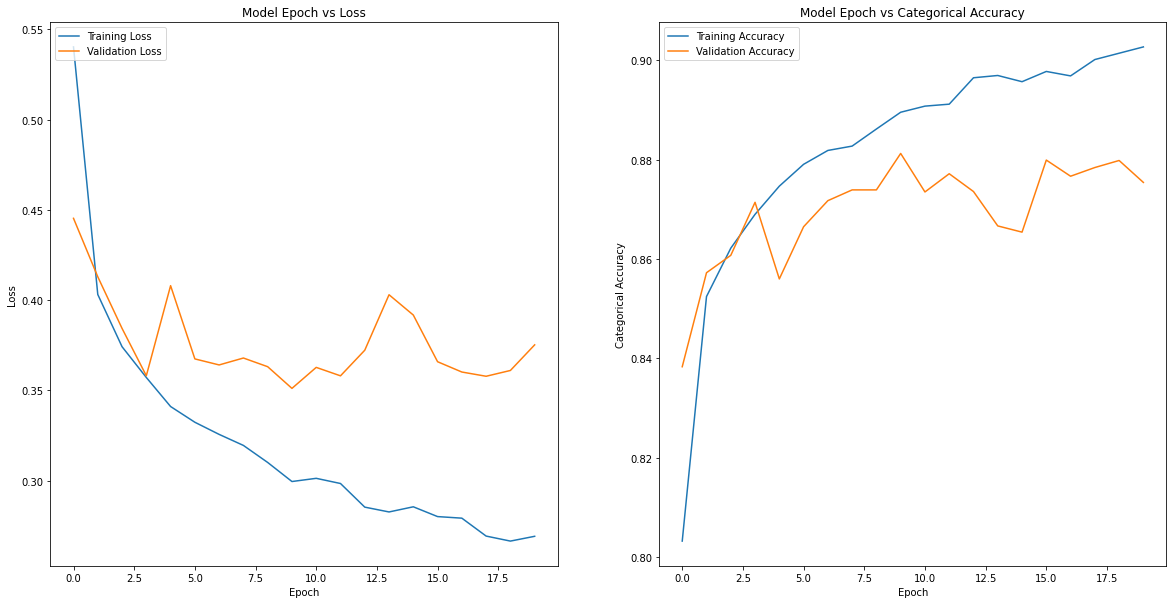

In [ ]:
# plot
plt.rcParams["figure.figsize"] = (20, 10)
figure , axes = plt.subplots(1, 2)


axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Epoch vs Loss')
axes[0].legend(['Training Loss', 'Validation Loss'], loc='upper left')


axes[1].plot(history.history['categorical_accuracy'])
axes[1].plot(history.history['val_categorical_accuracy'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Categorical Accuracy')
axes[1].set_title('Model Epoch vs Categorical Accuracy')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

### 3.3.1 Report metric score on test set

In [ ]:
# evaluate
results = model.evaluate(xtest, ytest)
print(f"Loss on Test Set: {results[0]}")
print(f"Categorical Accuracy on Test Set: {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.4124 - categorical_accuracy: 0.8677
Loss on Test Set: 0.41241440176963806
Categorical Accuracy on Test Set: 0.8676999807357788


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

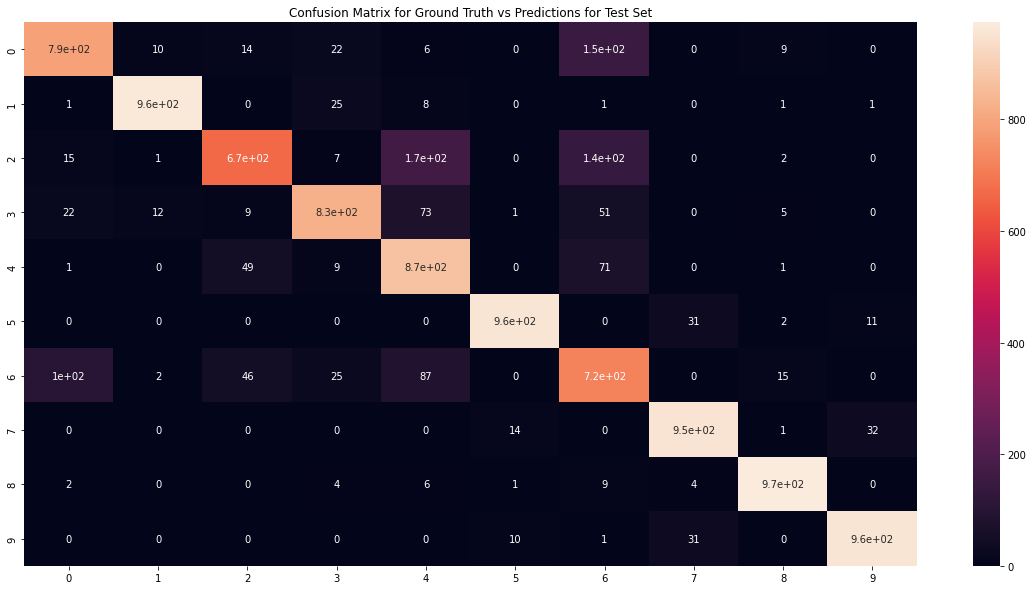

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Getting the predictions on the test set.
test_preds = list()
test_gts = list()
ypreds = model.predict(xtest)

for idx, ypred in enumerate(ypreds):
  class_pred = np.argmax(ypred)
  class_gt = np.argmax(ytest[idx])
  test_preds.append(class_pred)
  test_gts.append(class_gt)
  
cf_matrix = confusion_matrix(test_gts, test_preds)
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Ground Truth vs Predictions for Test Set")
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

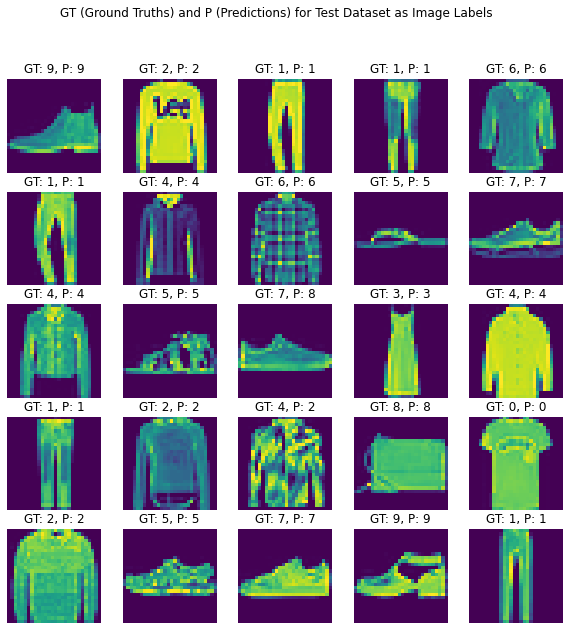

In [ ]:
# Plot with predictions
num_images_to_sample = 25
images_ls = xtest[:num_images_to_sample].reshape((num_images_to_sample, 28, 28))

fig, axes = plt.subplots(5, 5, figsize = (10, 10))
fig.suptitle("GT (Ground Truths) and P (Predictions) for Test Dataset as Image Labels")
for curr_idx, image in enumerate(images_ls):
    ax = axes[curr_idx//5, curr_idx%5]
    ax.imshow(image)
    ax.set_title(f"GT: {test_gts[curr_idx]}, P: {test_preds[curr_idx]}")
    ax.axis('off')
    
plt.show()

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [ ]:
# TODO: Standardize the datasets
xdev = xdev/255.0
xtest = xtest/255.0

# TODO: Encode the target labels
ydev = utils.to_categorical(ydev, 10)
ytest = utils.to_categorical(ytest, 10)

print(f"Shape of y-dev: {ydev.shape}")
print(f"Shape of y-test: {ytest.shape}")

# Split
xtrain, xval, ytrain, yval = train_test_split(xdev, ydev, test_size = 0.2)

print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xval: {xval.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of yval: {yval.shape}")

Shape of y-dev: (60000, 10)
Shape of y-test: (10000, 10)
Shape of xtrain: (48000, 28, 28)
Shape of xval: (12000, 28, 28)
Shape of ytrain: (48000, 10)
Shape of yval: (12000, 10)


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [ ]:
# TODO: build the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

lenet5_model = Sequential()

lenet5_model.add(Conv2D(filters = 6, kernel_size = (5, 5), 
                 strides = (1, 1), padding = "same", 
                 activation = "relu", 
                 input_shape = (xtrain.shape[1], xtrain.shape[1], 1)))
lenet5_model.add(MaxPooling2D((2, 2)))

lenet5_model.add(Conv2D(filters = 16, kernel_size = (5, 5), 
                 strides = (1, 1), padding = "valid", 
                 activation = "relu"))
lenet5_model.add(MaxPooling2D((2, 2)))

lenet5_model.add(Conv2D(filters = 120, kernel_size = (5, 5), activation = "relu"))

lenet5_model.add(Flatten())
lenet5_model.add(Dense(84, activation = "relu"))

# I am using Softmax function in the last layer
lenet5_model.add(Dense(10, activation = "softmax")) 

lenet5_model.build()

### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [ ]:
# TODO: report model output dimensions
lenet5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
# TODO: Train the model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

lenet5_model.compile(loss = CategoricalCrossentropy(), 
              optimizer = Adam(learning_rate = 1e-2), 
              metrics = [CategoricalAccuracy()])
history = lenet5_model.fit(xtrain, ytrain, batch_size = 128, epochs = 10, validation_data = (xval, yval))

Epoch 1/10
375/375 [==============================] - 11s 9ms/step - loss: 0.5456 - categorical_accuracy: 0.7941 - val_loss: 0.3710 - val_categorical_accuracy: 0.8588
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3598 - categorical_accuracy: 0.8651 - val_loss: 0.3339 - val_categorical_accuracy: 0.8784
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3280 - categorical_accuracy: 0.8780 - val_loss: 0.3215 - val_categorical_accuracy: 0.8842
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3141 - categorical_accuracy: 0.8820 - val_loss: 0.3442 - val_categorical_accuracy: 0.8743
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2981 - categorical_accuracy: 0.8890 - val_loss: 0.3195 - val_categorical_accuracy: 0.8863
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2892 - categorical_accuracy: 0.8924 - val_loss: 0.3042 - val_categorical_accuracy: 0.8917
Epo

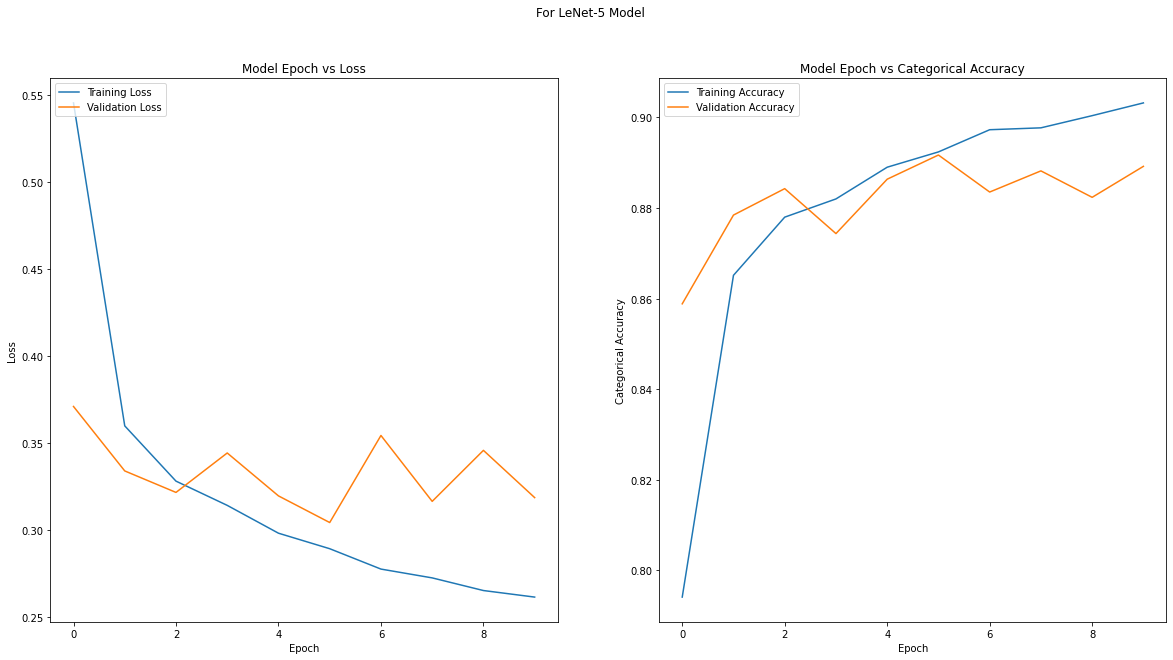

In [ ]:
# TODO: Plot accuracy and loss over epochs
plt.rcParams["figure.figsize"] = (20, 10)

figure , axes = plt.subplots(1, 2)
figure.suptitle("For LeNet-5 Model")

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Epoch vs Loss')
axes[0].legend(['Training Loss', 'Validation Loss'], loc='upper left')


axes[1].plot(history.history['categorical_accuracy'])
axes[1].plot(history.history['val_categorical_accuracy'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Categorical Accuracy')
axes[1].set_title('Model Epoch vs Categorical Accuracy')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

In [ ]:
# TODO: Report model performance on test set
results = lenet5_model.evaluate(xtest, ytest)
print(f"Loss on Test Set: {results[0]}")
print(f"Categorical Accuracy on Test Set are: {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3438 - categorical_accuracy: 0.8817
Loss on Test Set: 0.34382644295692444
Categorical Accuracy on Test Set are: 0.8816999793052673


**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

From the plot involving losses above, we can see that the training loss shows a downward trend but the validation loss decreases till epoch 6 and starts increasing after that, albeit slowly.
Also, from the plot involving accuracies (metric) above, we see that the training accuracies show an upward trend, but the validation accuracy first plateaus and also shows a downward trend after the 6th epoch. 
<br><br>
Signs of Overfitting:
1. As the Validation loss starts showing an upward trend while the training loss is going down (after the 6th epoch), this clearly shows that our model starts to overfit at the end.
2. As the Validation Accuracy increases but then starts showing some downward trend while the training accuracy goes up, this also bolsters the fact that the model is surely overfitting.
<br><br>
Common techniques to prevent overfitting are Dropout and Batch Normalization

### 4.2.4 Report metric score on test set

In [ ]:
# evaluate on test set
results = lenet5_model.evaluate(xtest, ytest)
print(f"Loss on Test Set: {results[0]}")
print(f"Categorical Accuracy on Test Set: {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3438 - categorical_accuracy: 0.8817
Loss on Test Set: 0.34382644295692444
Categorical Accuracy on Test Set: 0.8816999793052673


### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [ ]:
# TODO: build the model with drop-out layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

lenet5_model_dropout = Sequential()

lenet5_model_dropout.add(Conv2D(filters = 6, kernel_size = (5, 5), 
                                strides = (1, 1), padding = "same", 
                                activation = "relu", 
                                input_shape = (xtrain.shape[1], 
                                               xtrain.shape[1], 1)))
lenet5_model_dropout.add(MaxPooling2D((2, 2)))

lenet5_model_dropout.add(Conv2D(filters = 16, kernel_size = (5, 5), 
                                strides = (1, 1), padding = "valid", 
                                activation = "relu"))
lenet5_model_dropout.add(MaxPooling2D((2, 2)))

lenet5_model_dropout.add(Conv2D(filters = 120, kernel_size = (5, 5),
                                activation = "relu"))
lenet5_model_dropout.add(Flatten())
lenet5_model_dropout.add(Dropout(0.5))

lenet5_model_dropout.add(Dense(84, activation = "relu"))
lenet5_model_dropout.add(Dropout(0.5))

# I am using Softmax function in the last layer
lenet5_model_dropout.add(Dense(10, activation = "softmax")) 

lenet5_model_dropout.build()

In [ ]:
# TODO: train the model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

lenet5_model_dropout.compile(loss = CategoricalCrossentropy(), 
              optimizer = Adam(learning_rate = 1e-2), 
              metrics = [CategoricalAccuracy()])
history = lenet5_model_dropout.fit(xtrain, ytrain, batch_size = 128, epochs = 15, validation_data = (xval, yval))

Epoch 1/15
375/375 [==============================] - 4s 9ms/step - loss: 0.7708 - categorical_accuracy: 0.7199 - val_loss: 0.4402 - val_categorical_accuracy: 0.8344
Epoch 2/15
375/375 [==============================] - 4s 9ms/step - loss: 0.5430 - categorical_accuracy: 0.8099 - val_loss: 0.4179 - val_categorical_accuracy: 0.8508
Epoch 3/15
375/375 [==============================] - 3s 9ms/step - loss: 0.5159 - categorical_accuracy: 0.8212 - val_loss: 0.4026 - val_categorical_accuracy: 0.8522
Epoch 4/15
375/375 [==============================] - 4s 11ms/step - loss: 0.5180 - categorical_accuracy: 0.8212 - val_loss: 0.3993 - val_categorical_accuracy: 0.8547
Epoch 5/15
375/375 [==============================] - 3s 9ms/step - loss: 0.4988 - categorical_accuracy: 0.8310 - val_loss: 0.3995 - val_categorical_accuracy: 0.8528
Epoch 6/15
375/375 [==============================] - 4s 9ms/step - loss: 0.5082 - categorical_accuracy: 0.8279 - val_loss: 0.3818 - val_categorical_accuracy: 0.8635
Epo

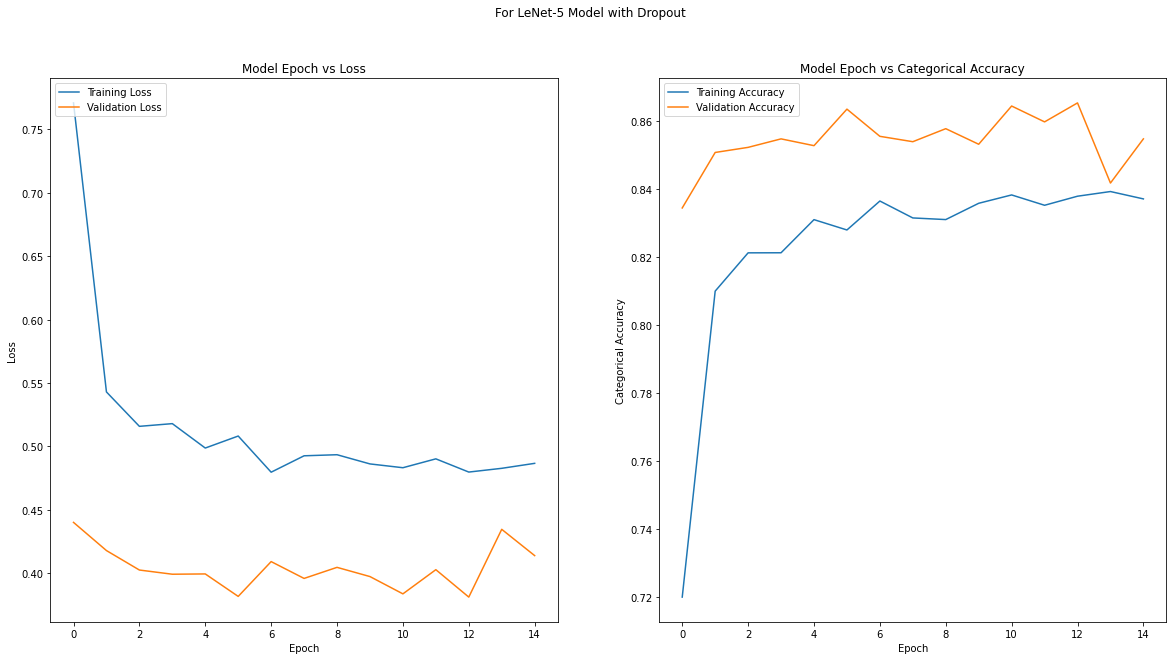

In [ ]:
# TODO: plot 
plt.rcParams["figure.figsize"] = (20, 10)

figure , axes = plt.subplots(1, 2)
figure.suptitle("For LeNet-5 Model with Dropout")

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Epoch vs Loss')
axes[0].legend(['Training Loss', 'Validation Loss'], loc='upper left')


axes[1].plot(history.history['categorical_accuracy'])
axes[1].plot(history.history['val_categorical_accuracy'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Categorical Accuracy')
axes[1].set_title('Model Epoch vs Categorical Accuracy')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

In [ ]:
# TODO: Report model performance on test set
results = lenet5_model_dropout.evaluate(xtest, ytest)
print(f"Loss on Test Set: {results[0]}")
print(f"Categorical Accuracy on Test Set are: {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.4233 - categorical_accuracy: 0.8537
Loss on Test Set: 0.42333686351776123
Categorical Accuracy on Test Set are: 0.8536999821662903


**What's your observation?**

**Answer:** Depending on the loss curve above, the trend for the validation loss is a downward one but slighly increases at the end while the training loss decreases and then approxiamtely plateaus at the end. Furthemore, we can also see that initially, the training and validation loss drops more rapidly as compared to before.
<br>
Also, depending on the accuracy curve above, the trend for the validation accuracy is a upward one but then plateaus and slightly decreases near the end, while the training accuracy is increasing. Interestingly, we can also see that initially, the training accuracy increases more rapidly as compared to before.
<br>
Furthermore, the above trends show that the model still overfits slightly at the end.
<br>
Lastly, the accuracy for the lenet-5 model has decreased by 88.169 - 85.369 = 2.8% in comparison to the original lenet-5 model. 

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [ ]:
# TODO: build the model with batch normalization layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation

lenet5_model_bn = Sequential()

lenet5_model_bn.add(Conv2D(filters = 6, kernel_size = (5, 5), 
                 strides = (1, 1), padding = "same",  
                 input_shape = (xtrain.shape[1], xtrain.shape[1], 1)))
lenet5_model_bn.add(Activation("relu"))
lenet5_model_bn.add(MaxPooling2D((2, 2)))

lenet5_model_bn.add(Conv2D(filters = 16, kernel_size = (5, 5), 
                 strides = (1, 1), padding = "valid"))
lenet5_model_bn.add(Activation("relu"))
lenet5_model_bn.add(MaxPooling2D((2, 2)))

lenet5_model_bn.add(Conv2D(filters = 120, kernel_size = (5, 5)))
lenet5_model_bn.add(Activation("relu"))
lenet5_model_bn.add(Flatten())
lenet5_model_bn.add(BatchNormalization())

lenet5_model_bn.add(Dense(84))
lenet5_model_bn.add(Activation("relu"))
lenet5_model_bn.add(BatchNormalization())

# I am using Softmax function in the last layer
lenet5_model_bn.add(Dense(10, activation = "softmax")) 

lenet5_model_bn.build()

In [ ]:
# TODO: train the model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

lenet5_model_bn.compile(loss = CategoricalCrossentropy(), 
              optimizer = Adam(learning_rate = 1e-2), 
              metrics = [CategoricalAccuracy()])
history = lenet5_model_bn.fit(xtrain, ytrain, batch_size = 128, epochs = 15, validation_data = (xval, yval))

Epoch 1/15
375/375 [==============================] - 5s 10ms/step - loss: 0.4454 - categorical_accuracy: 0.8365 - val_loss: 0.5143 - val_categorical_accuracy: 0.8296
Epoch 2/15
375/375 [==============================] - 4s 9ms/step - loss: 0.3322 - categorical_accuracy: 0.8770 - val_loss: 0.3467 - val_categorical_accuracy: 0.8788
Epoch 3/15
375/375 [==============================] - 4s 10ms/step - loss: 0.3021 - categorical_accuracy: 0.8860 - val_loss: 0.4253 - val_categorical_accuracy: 0.8476
Epoch 4/15
375/375 [==============================] - 4s 10ms/step - loss: 0.2796 - categorical_accuracy: 0.8957 - val_loss: 0.3103 - val_categorical_accuracy: 0.8891
Epoch 5/15
375/375 [==============================] - 4s 9ms/step - loss: 0.2593 - categorical_accuracy: 0.9039 - val_loss: 0.3526 - val_categorical_accuracy: 0.8654
Epoch 6/15
375/375 [==============================] - 4s 10ms/step - loss: 0.2505 - categorical_accuracy: 0.9061 - val_loss: 0.3611 - val_categorical_accuracy: 0.8688


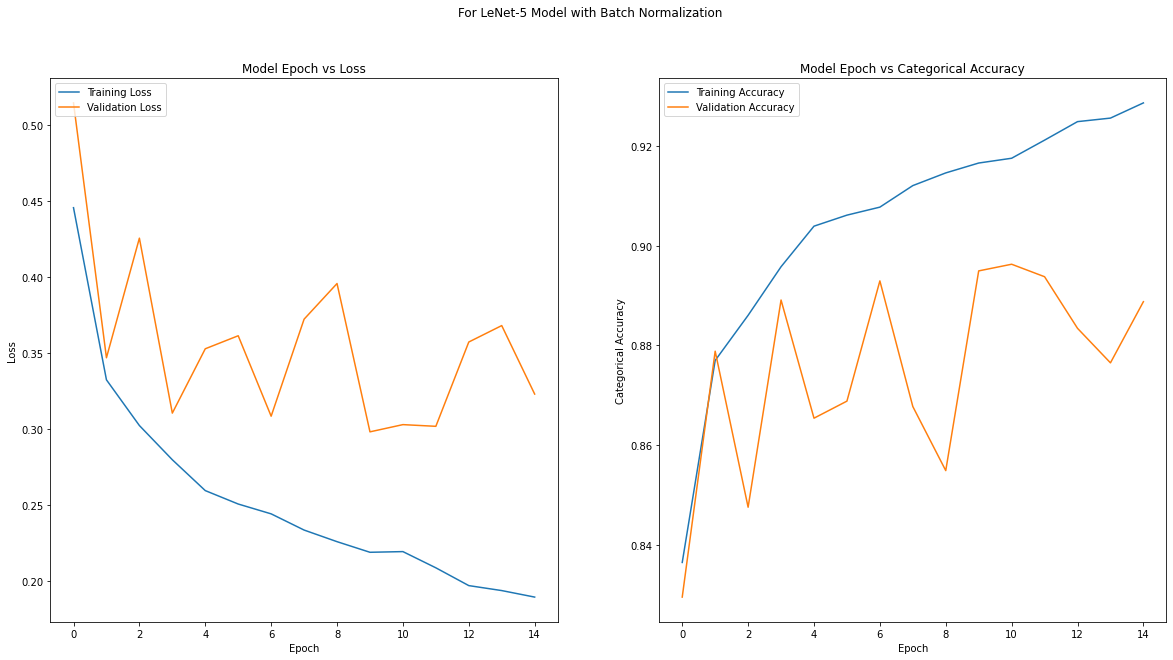

In [ ]:
# TODO: plot
plt.rcParams["figure.figsize"] = (20, 10)

figure , axes = plt.subplots(1, 2)
figure.suptitle("For LeNet-5 Model with Batch Normalization")

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Epoch vs Loss')
axes[0].legend(['Training Loss', 'Validation Loss'], loc='upper left')


axes[1].plot(history.history['categorical_accuracy'])
axes[1].plot(history.history['val_categorical_accuracy'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Categorical Accuracy')
axes[1].set_title('Model Epoch vs Categorical Accuracy')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

plt.show()

In [ ]:
# TODO: Report model performance on test set
results = lenet5_model_bn.evaluate(xtest, ytest)
print(f"Loss on Test Set: {results[0]}")
print(f"Categorical Accuracy on Test Set are: {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3567 - categorical_accuracy: 0.8799
Loss on Test Set: 0.3567424714565277
Categorical Accuracy on Test Set are: 0.8798999786376953


**Observation, comparison with Dropout:**

**Answer**: As we can see above, the plot for the losses shows the validation loss with a generic downward trend with some spikes and increases a little at the end, while the training loss shows a strong downward trend till the end. Also, from the accuracy curves, we can see that the validation accuracy plateaus at the end while the training accuracy shows a strong upward trend. This shows us that the model with batch normalization performs quite better in comparison to the original lenet model and the model with dropout. 
<br>
Furthermore, the accuracy is 87.98% which is quite comparable, albeit a little less, with that of the original lenet model which has an accuracy of 88.16%. Also, the accuray for the model with batch normalization is more than the accuracy for the model with dropout. 
<br>
Looking at the trends and the performance metric, we can deduce that the model with batch normalization helps with overfitting more efficiently in comparison to the dropout in this case.